# Невероятный семинар 12


![](https://img.libquotes.com/pic-quotes/v1/douglas-adams-quote-lbi0u1t.jpg)

Тут мы импортируем все вкусности:

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
from scipy.optimize import minimize
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

### Задачунька 1. 

Винни-Пух висит напротив дупла с неправильными пчёлами на воздушном шарике. Пятачок выстрелил по шарику 10 раз. При этом он 3 раза попал в Винни-Пуха и 7 раз промазал как мимо шарика, так и мимо Пуха.

Выстрелы Пятачка независимы. Вероятность попадания в Винни-Пуха равна неизвестному параметру $p$. 

1. Напиши функцию `likelihood`, которая при данном $p$ выдаёт вероятность попасть 3 раза и промазать 7 раз. Эта функция называется **функцией правдоподобия** имеющихся наблюдений.

2. Построй график функции и график логарифма этой функции на двух отдельных графиках. 

3. По графикам определи, при каком $p$ функция `likelihood` достигает своего максимума. Назовём данную величину оценкой максимального правдоподобия и обозначим $\hat p$.

4. Найди минимум написанной тобой функции `likelihood` с помощью питона. Помочь может функция для минизации функций, `minimize`.

5. Без всякого кода словами поясни, почему $\hat p$ не обязано равняться истинному $p$.

/home/boris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


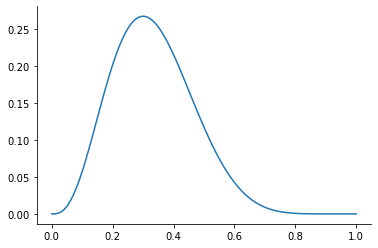

In [81]:
p = np.linspace(0, 1, 100)

def likelihood(p):
    return 10 * 9 * 8 / 6 * p ** 3 * (1 - p) ** 7

y = likelihood(p)
y2 = np.log(likelihood(p))


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.plot(p, y)

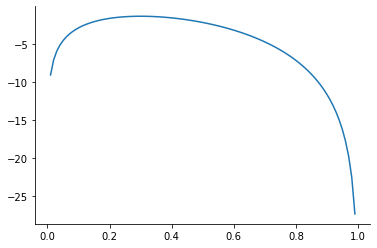

In [82]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.plot(p, y2)

In [98]:
def minus_likelihood(p):
    return -likelihood(p)

minus_likelihood(0.4)

-0.21499084799999998

In [101]:
p_init = 0.5

optim_res = minimize(minus_likelihood, p_init)
optim_res.fun, optim_res.x

(-0.26682793199999905, array([0.29999999]))

### Задачулька 2.

Построй график функции $\Lambda(t) = \exp(t)/(1+\exp(t))$.

По графику ответь на вопросы:

1. Монотонна ли функция?

1. Чему равны её пределы справа и слева?

1. Относительно какой точки симметричен график?

1. Какие значения принимает функция при произвольных $t$?

Подсказочка: Можно взять готовую функцию `expit`.

In [67]:
x = np.linspace(-5, 5, 100)
y = expit(x)

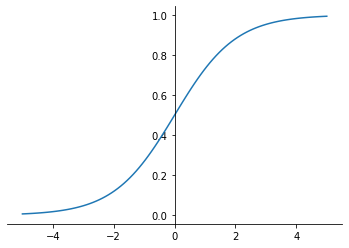

In [76]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.plot(x, y)

### Задаченция 3.

[Как известно](https://www.livelib.ru/quote/305456-malysh-i-karlson-kotoryj-zhivet-na-kryshe-astrid-lindgren), Фрекен Бок пьёт коньяк по утрам.

![](http://semyarf.com/UPLOAD/2016/01/21/frekenbok-216_700_0.jpg)

А у нас даже есть дневные данные (в граммах) $cognac$ и информация о том, видела ли  Фрекен Бок в этот день привидения, $ghost$:

In [44]:
fbock = pd.DataFrame({'cognac': [3.2, 7.9, 5.4, 4.9, 6.2, 4.3], 'ghost': [1, 1, 0, 0, 1, 1]})
fbock

,cognac,ghost
0,3.2,1
1,7.9,1
2,5.4,0
3,4.9,0
4,6.2,1
5,4.3,1


Мы предположим, что вероятность увидеть привидение имеет вид 
$$P(ghost_i=1|cognac_i)=\Lambda(\beta_1 + \beta_2 cognac_i)$$

1. Без всякого кода поясни, зачем тут понадобилась функция $\Lambda$, почему нельзя было обойтись без неё?

2. Напиши функцию правдоподобия `likelihood_fbock`, то есть функцию, которая будет на вход принимать вектор параметров $\beta$, а на выход выдавать вероятность имеющегося вектора $ghost$.

3. Найди максимум логарифма функции правдоподобия с помощью `minimize`. То есть найди оценки максимального правдоподобия $\hat\beta_1$ и $\hat\beta_2$.

4. Для полученных тобой  $\hat\beta_1$ и $\hat\beta_2$ построй график вероятности увидеть привидение в зависимости от количества выпитого коньяка.

In [52]:
def minus_llh(beta, ghost, cognac):
    probs_ghost = expit(beta[0] + beta[1] * cognac)
    probs_real = probs_ghost * ghost + (1 - probs_ghost) * (1 - ghost)
    log_probs = np.log(probs_real)
    return -np.sum(log_probs)
    
    

In [65]:
minus_llh((0, 0), fbock['ghost'], fbock['cognac'])

4.1588830833596715

In [64]:
beta_init = [0, 0]

optim_res = minimize(minus_llh, beta_init, args=(fbock['ghost'], fbock['cognac']))
optim_res.fun, optim_res.x

(3.799883407737796, array([0.08173212, 0.11593931]))

### Задачушечка 4.

Решая задачу 3 ты оценил параметры логистической регрессии методом максимального правдоподобия. Логистическая регрессия является широко известным алгоритмом, для которого в питоне есть много реализаций. Настала пора воспользоваться готовыми!

1. Получи оценки $\hat\beta_1$ и $\hat\beta_2$ по данным о Фрекен Бок с помощью `LinearRegression` из `sklearn.linear_models`.

2. Получи оценки $\hat\beta_1$ и $\hat\beta_2$ по данным о Фрекен Бок с помощью `logit` из `statsmodels.formula.api`.



In [45]:
logit = LogisticRegression()
X = fbock[['cognac']]
y = fbock['ghost']
fbock_logit = logit.fit(X, y)

fbock_logit.coef_

array([[0.08568807]])

In [46]:
fbock_logit.intercept_

array([0.24029101])

In [47]:
logit_sm = smf.logit(data=fbock, formula='ghost ~ cognac')

In [48]:
fbock_logit_sm = logit_sm.fit()

Optimization terminated successfully.
         Current function value: 0.633314
         Iterations 5


In [49]:
fbock_logit_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  ghost   No. Observations:                    6
Model:                          Logit   Df Residuals:                        4
Method:                           MLE   Df Model:                            1
Date:                Sun, 29 Nov 2020   Pseudo R-squ.:                0.005028
Time:                        23:08:51   Log-Likelihood:                -3.7999
converged:                       True   LL-Null:                       -3.8191
Covariance Type:            nonrobust   LLR p-value:                    0.8446
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0817      3.237      0.025      0.980      -6.262       6.426
cognac         0.1159      0.596      0.194      0.846      -1.053       1.284
==============================================================================
"""

### Задачуленция 5.

![](https://upload.wikimedia.org/wikipedia/en/a/a6/Pok%C3%A9mon_Pikachu_art.png)

1. Загрузи данные по покемонам, `pokemon.csv`. Сколько всего наблюдений? Переменных?

2. Посмотри на описательные статистики. В каких пределах лежат `attack`, `defense` и `speed`?

3. Построй гистограммы силы атаки для легендарных и нелегандарных покемонов на одном графике. 

4. Построй аналогичные два графика для силы защиты и скорости. На каждом графике должны быть наложены две гистограммы: для легендарных и нелегендарных покемонов. 

5. Оцени параметры логистической регрессии:

$$P(legendary_i=1|attack_i, defense_i, speed_i)=\Lambda(\beta_1 + \beta_2 attack_i +\beta_3 defense_i +\beta_4 speed_i)$$

6. Оцени вероятность покемона с атакой 60, защитой 70 и скоростью 140 быть легендарным с помощью найденных тобой $\hat\beta_1$, $\hat\beta_2$, $\hat\beta_3$, $\hat\beta_4$.


In [12]:
poks = pd.read_csv('/home/boris/Downloads/pokemon.csv')

In [13]:
poks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
against_bug,801.0,9.962547e-01,0.597248,0.25,0.5,1.0,1.0,4.0
against_dark,801.0,1.057116e+00,0.438142,0.25,1.0,1.0,1.0,4.0
against_dragon,801.0,9.687890e-01,0.353058,0.00,1.0,1.0,1.0,2.0
against_electric,801.0,1.073970e+00,0.654962,0.00,0.5,1.0,1.0,4.0
against_fairy,801.0,1.068976e+00,0.522167,0.25,1.0,1.0,1.0,4.0
against_fight,801.0,1.065543e+00,0.717251,0.00,0.5,1.0,1.0,4.0
against_fire,801.0,1.135456e+00,0.691853,0.25,0.5,1.0,2.0,4.0
against_flying,801.0,1.192884e+00,0.604488,0.25,1.0,1.0,1.0,4.0
against_ghost,801.0,9.850187e-01,0.558256,0.00,1.0,1.0,1.0,4.0
against_grass,801.0,1.034020e+00,0.788896,0.25,0.5,1.0,1.0,4.0


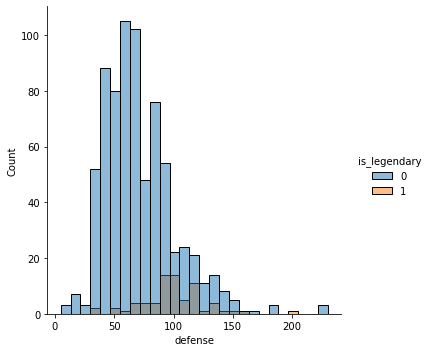

In [32]:
sns.displot(data=poks, x='defense', hue='is_legendary')

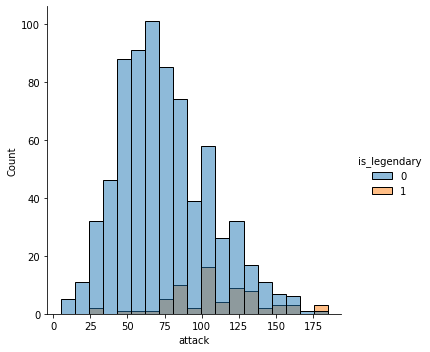

In [33]:
sns.displot(data=poks, x='attack', hue='is_legendary')

In [16]:
predictors = ['attack', 'defense', 'speed']
X = poks[predictors]
y = poks['is_legendary']

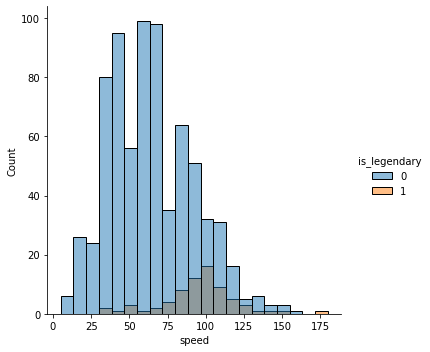

In [34]:
sns.displot(data=poks, x='speed', hue='is_legendary')

In [17]:
logit = LogisticRegression()
poks_logit = logit.fit(X, y)

poks_logit.coef_

array([[0.01303822, 0.03262642, 0.0427452 ]])

In [18]:
poks_logit.intercept_

array([-9.78448028])

In [31]:
new_pok = pd.DataFrame({'attack': [60], 'defense': [70], 'speed': [140]})
poks_logit.predict_proba(new_pok)

array([[0.67568467, 0.32431533]])

In [42]:
logit_sm = smf.logit(data=poks, formula='is_legendary ~ attack + defense + speed')
poks_logit_sm = logit_sm.fit()

Optimization terminated successfully.
         Current function value: 0.202951
         Iterations 8


In [43]:
poks_logit_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           is_legendary   No. Observations:                  801
Model:                          Logit   Df Residuals:                      797
Method:                           MLE   Df Model:                            3
Date:                Sun, 29 Nov 2020   Pseudo R-squ.:                  0.3154
Time:                        23:07:42   Log-Likelihood:                -162.56
converged:                       True   LL-Null:                       -237.46
Covariance Type:            nonrobust   LLR p-value:                 2.910e-32
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.7848      0.887    -11.029      0.000     -11.524      -8.046
attack         0.0130      0.005      2.688      0.007       0.004       0.023
defense        0.0326      0.005      6.126      0.000       0.022       0.043
speed          0.0427      0.006      7.160      0.000       0.031       0.054
==============================================================================
"""